In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from folium.plugins import HeatMap
import folium
import plotly.express as px
import geopandas as gpd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

In [ ]:
wildfire = pd.read_excel('fp-historical-wildfire-data-2006-2024.xlsx')
wildfire.head()

,YEAR,FIRE_NUMBER,FIRE_NAME,CURRENT_SIZE,SIZE_CLASS,LATITUDE,LONGITUDE,FIRE_ORIGIN,GENERAL_CAUSE,INDUSTRY_IDENTIFIER,...,DISTANCE_FROM_WATER_SOURCE,FIRST_BUCKET_DROP_DATE,FIRST_BH_DATE,FIRST_BH_SIZE,FIRST_UC_DATE,FIRST_UC_SIZE,FIRST_TO_DATE,FIRST_TO_SIZE,FIRST_EX_DATE,FIRST_EX_SIZE_PERIMETER
0,2006,PWF001,NaN,0.10,A,56.249956,-117.181960,Private Land,Resident,NaN,...,NaN,NaN,2006-04-02 22:00:00,0.01,2006-04-02 22:00:00,0.01,NaN,NaN,2006-04-03 10:20:00,0.10
1,2006,EWF002,NaN,0.20,B,53.606367,-115.915733,Provincial Land,Incendiary,NaN,...,NaN,NaN,2006-04-03 13:20:00,0.20,2006-04-03 13:20:00,0.20,NaN,NaN,2006-04-03 14:00:00,0.20
2,2006,EWF001,NaN,0.50,B,53.610933,-115.594267,Provincial Land,Incendiary,NaN,...,NaN,NaN,2006-04-03 13:23:00,0.50,2006-04-03 13:23:00,0.50,NaN,NaN,2006-04-03 15:00:00,0.50
3,2006,EWF003,NaN,0.01,A,53.608867,-115.609467,Provincial Land,Incendiary,NaN,...,NaN,NaN,2006-04-03 14:08:00,0.01,2006-04-03 14:08:00,0.01,NaN,NaN,2006-04-03 15:05:00,0.01
4,2006,PWF002,NaN,0.10,A,56.249956,-117.050249,Provincial Land,Other Industry,Waste Disposal,...,NaN,NaN,2006-04-03 19:57:00,0.10,2006-04-03 20:19:00,0.10,2006-04-03 20:20:00,0.1,2006-04-05 10:18:00,0.10


In [ ]:
wildfire.shape

(26551, 50)

The dataset contains 26551 entries and 50 columns

In [ ]:
wildfire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26551 entries, 0 to 26550
Data columns (total 50 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   YEAR                          26551 non-null  int64  
 1   FIRE_NUMBER                   26551 non-null  object 
 2   FIRE_NAME                     795 non-null    object 
 3   CURRENT_SIZE                  26551 non-null  float64
 4   SIZE_CLASS                    26551 non-null  object 
 5   LATITUDE                      26551 non-null  float64
 6   LONGITUDE                     26551 non-null  float64
 7   FIRE_ORIGIN                   26539 non-null  object 
 8   GENERAL_CAUSE                 26551 non-null  object 
 9   INDUSTRY_IDENTIFIER           480 non-null    object 
 10  RESPONSIBLE_GROUP             9522 non-null   object 
 11  ACTIVITY_CLASS                16135 non-null  object 
 12  TRUE_CAUSE                    14022 non-null  object 
 13  F

In [ ]:
wildfire.isnull().sum()

,0
YEAR,0
FIRE_NUMBER,0
FIRE_NAME,25756
CURRENT_SIZE,0
SIZE_CLASS,0
LATITUDE,0
LONGITUDE,0
FIRE_ORIGIN,12
GENERAL_CAUSE,0
INDUSTRY_IDENTIFIER,26071


Creating a subset of the table that will be used for our analysis instead of dropping to not permanently delete the data before analyzing


In [ ]:
wildfire_subset = wildfire[['YEAR','FIRE_NUMBER','SIZE_CLASS','LATITUDE','LONGITUDE','GENERAL_CAUSE','DETECTION_AGENT_TYPE','DETECTION_AGENT','FIRE_START_DATE','FIRE_SPREAD_RATE','FUEL_TYPE','TEMPERATURE','RELATIVE_HUMIDITY','WIND_SPEED','FIRST_EX_DATE','FIRST_EX_SIZE_PERIMETER']]

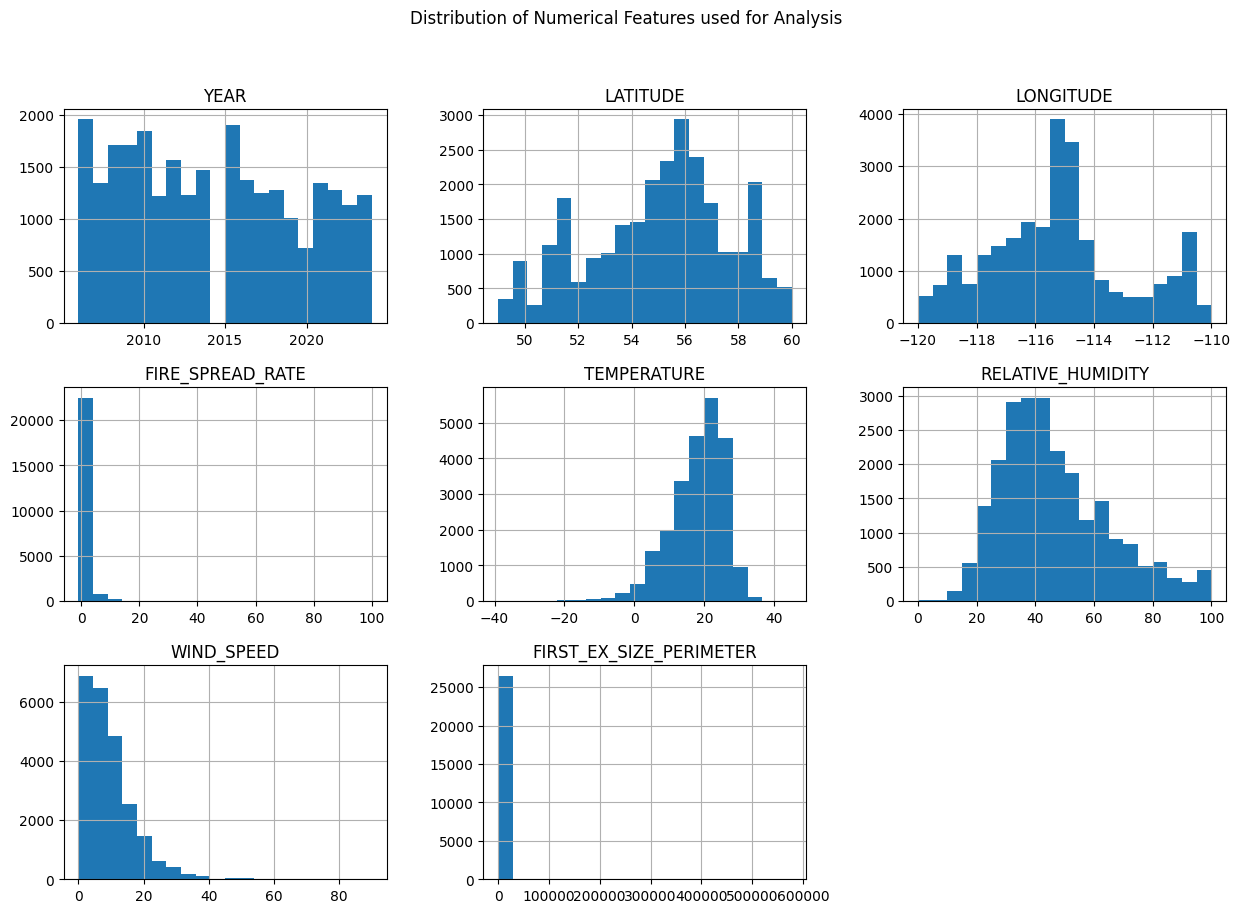

In [ ]:
# Plot histograms for numerical features
dist_wildfire = wildfire[['YEAR','FIRE_NUMBER','LATITUDE','LONGITUDE','FIRE_SPREAD_RATE','TEMPERATURE','RELATIVE_HUMIDITY','WIND_SPEED']]

wildfire_subset.hist(figsize=(15, 10), bins=20)
plt.suptitle("Distribution of Numerical Features used for Analysis")
plt.show()

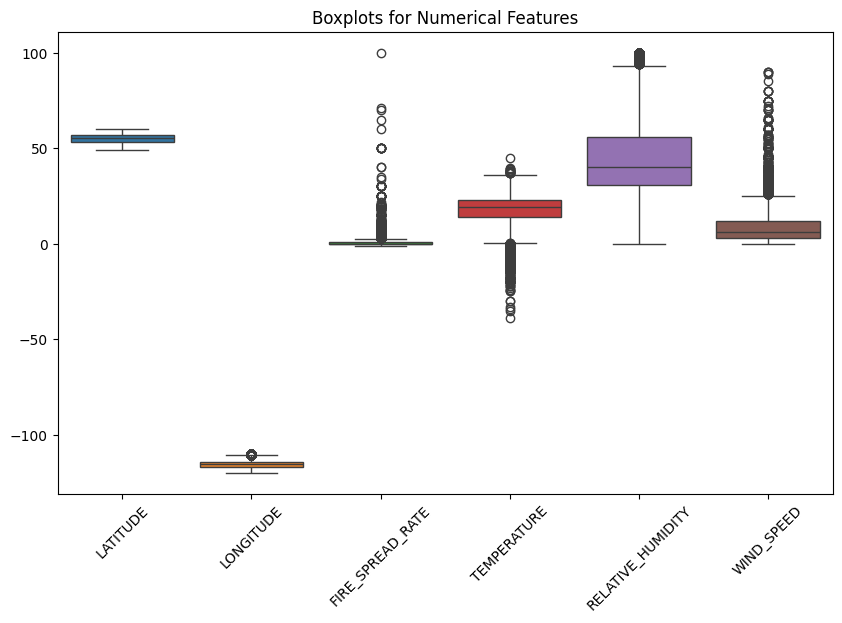

In [ ]:
# Plot boxplots for numerical features to detect outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=wildfire_subset.iloc[:,2:-1])
plt.title("Boxplots for Numerical Features")
plt.xticks(rotation=45)
plt.show()

In [ ]:
wildfire_subset.isnull().sum()

,0
YEAR,0
FIRE_NUMBER,0
SIZE_CLASS,0
LATITUDE,0
LONGITUDE,0
GENERAL_CAUSE,0
DETECTION_AGENT_TYPE,0
DETECTION_AGENT,0
FIRE_START_DATE,689
FIRE_SPREAD_RATE,2806


In [ ]:
#Identifying the unique cause of the general cause
wildfire_subset['GENERAL_CAUSE'].unique()

array(['Resident', 'Incendiary', 'Other Industry', 'Undetermined',
       'Forest Industry', 'Lightning', 'Recreation', 'Restart',
       'Oil & Gas Industry', 'Power Line Industry', 'Railroad',
       'Prescribed Fire', 'Agriculture Industry', 'Government',
       'Under Investigation'], dtype=object)

In [ ]:
wildfire_subset['GENERAL_CAUSE'].count()

26551

<ipython-input-13-9687e5844d99>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=count_cause.index, x=count_cause.values, palette= colors)


Text(0.5, 1.0, 'Count of Fires by General Cause')

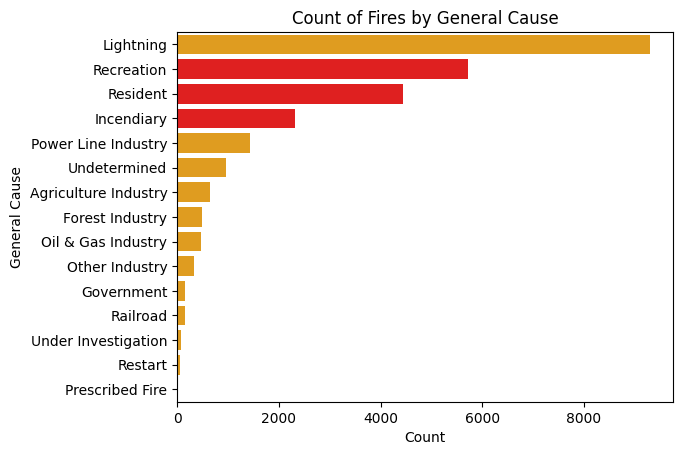

In [ ]:
#Finding the total count of fires based on the general cause
count_cause = wildfire_subset['GENERAL_CAUSE'].value_counts()

highlight = ['Recreation', 'Resident', 'Incendiary']  # Categories to highlight

# Assign colors (highlighted bars in red, others in blue)
colors = ['red' if cat in highlight else 'orange' for cat in count_cause.index]

sns.barplot(y=count_cause.index, x=count_cause.values, palette= colors)
plt.ylabel('General Cause')
plt.xlabel('Count')

plt.title('Count of Fires by General Cause')

In [ ]:
count_cause

,count
GENERAL_CAUSE,
Lightning,9292
Recreation,5730
Resident,4442
Incendiary,2310
Power Line Industry,1429
Undetermined,954
Agriculture Industry,653
Forest Industry,491
Oil & Gas Industry,467


As we can see most forest fires a total of 12482 out of 26551 (47%) are caused by people of  recreation(campers, berry pickers, fishers, etc), resident( houses in forest areas) and incendiary(intentional fire)

In [ ]:
#Identifying the rows with null values with unknown start date
wildfire_subset[wildfire_subset['FIRE_START_DATE'].isnull()]

,YEAR,FIRE_NUMBER,SIZE_CLASS,LATITUDE,LONGITUDE,GENERAL_CAUSE,DETECTION_AGENT_TYPE,DETECTION_AGENT,FIRE_START_DATE,FIRE_SPREAD_RATE,FUEL_TYPE,TEMPERATURE,RELATIVE_HUMIDITY,WIND_SPEED,FIRST_EX_DATE,FIRST_EX_SIZE_PERIMETER
2889,2006,MWF174,A,56.307583,-110.914333,Recreation,UNP,310,NaN,NaN,NaN,NaN,NaN,NaN,2007-01-08 14:50:00,0.01
6231,2010,CWF045,A,51.403617,-115.067017,Recreation,GRP,FRST,NaN,NaN,NaN,NaN,NaN,NaN,2010-05-23 12:25:00,0.01
6232,2010,CWF047,A,51.404067,-115.054500,Recreation,GRP,FRST,NaN,NaN,NaN,NaN,NaN,NaN,2010-05-23 13:23:00,0.01
6354,2010,CWF040,A,50.851567,-114.632583,Recreation,GRP,FRST,NaN,NaN,NaN,NaN,NaN,NaN,2010-05-22 12:50:00,0.01
6355,2010,CWF043,A,51.274374,-115.025952,Recreation,GRP,FRST,NaN,NaN,NaN,NaN,NaN,NaN,2010-05-22 16:50:00,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26306,2024,EWF101,A,52.861461,-117.016682,Recreation,GRP,FRST,NaN,NaN,NaN,NaN,NaN,NaN,2024-09-02 14:15:00,0.01
26307,2024,EWF102,A,52.876013,-116.908012,Recreation,GRP,FRST,NaN,NaN,NaN,NaN,NaN,NaN,2024-09-02 15:05:00,0.01
26308,2024,EWF103,A,52.876013,-116.908012,Recreation,GRP,FRST,NaN,NaN,NaN,NaN,NaN,NaN,2024-09-02 14:50:00,0.01
26496,2024,EWF034,A,53.570550,-116.737867,Recreation,GRP,FRST,NaN,0.0,NaN,10.0,60.0,5.0,2024-05-20 12:30:00,0.01


Since most of the data for unknown start date is missing, these values are dropped from the dataset for clustering and analysis purposes. However, the original data will be used for representing the count and the distribution.

In [ ]:
#Dropping rows with Nan start date values.
wildfire_subset = wildfire_subset.dropna(subset=['FIRE_START_DATE'])

In [ ]:
#Dropping rows with Nan extinguished date values.
wildfire_subset = wildfire_subset.dropna(subset=['FIRST_EX_DATE'])

In [ ]:
wildfire_subset.head()

,YEAR,FIRE_NUMBER,SIZE_CLASS,LATITUDE,LONGITUDE,GENERAL_CAUSE,DETECTION_AGENT_TYPE,DETECTION_AGENT,FIRE_START_DATE,FIRE_SPREAD_RATE,FUEL_TYPE,TEMPERATURE,RELATIVE_HUMIDITY,WIND_SPEED,FIRST_EX_DATE,FIRST_EX_SIZE_PERIMETER,MONTH,DAYS_COUNT
0,2006,PWF001,A,56.249956,-117.181960,Resident,UNP,310,2006-04-02 12:00:00,0.0,O1a,18.0,10.0,2.0,2006-04-03 10:20:00,0.10,4.0,0.0
1,2006,EWF002,B,53.606367,-115.915733,Incendiary,UNP,310,2006-04-03 12:10:00,0.0,O1a,12.0,22.0,10.0,2006-04-03 14:00:00,0.20,4.0,0.0
2,2006,EWF001,B,53.610933,-115.594267,Incendiary,UNP,310,2006-04-03 12:15:00,0.0,O1a,12.0,22.0,10.0,2006-04-03 15:00:00,0.50,4.0,0.0
3,2006,EWF003,A,53.608867,-115.609467,Incendiary,UNP,PUB,2006-04-03 12:10:00,0.0,O1b,12.0,22.0,10.0,2006-04-03 15:05:00,0.01,4.0,0.0
4,2006,PWF002,A,56.249956,-117.050249,Other Industry,UNP,LFS,2006-04-03 17:00:00,0.1,NaN,6.0,37.0,2.0,2006-04-05 10:18:00,0.10,4.0,1.0


In [ ]:
wildfire_subset['FIRE_START_DATE'] = pd.to_datetime(wildfire_subset['FIRE_START_DATE'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
wildfire_subset['FIRST_EX_DATE'] = pd.to_datetime(wildfire_subset['FIRST_EX_DATE'], format='%Y-%m-%d %H:%M:%S', errors='coerce')


In [ ]:
wildfire_subset['MONTH'] = wildfire_subset['FIRE_START_DATE'].dt.month

In [ ]:
#Filling the missing values for temperature, relative humidity, wind speed, fire spread rate with the average for that year
#Columns to fill missing values
columns_to_fill = ['TEMPERATURE', 'RELATIVE_HUMIDITY', 'WIND_SPEED', 'FIRE_SPREAD_RATE']

#Fill NaN values with the mean for that year
wildfire_subset[columns_to_fill] = wildfire_subset.groupby('MONTH')[columns_to_fill].transform(lambda x: x.fillna(x.mean()))

In [ ]:
wildfire_subset.isnull().sum()

,0
YEAR,0
FIRE_NUMBER,0
SIZE_CLASS,0
LATITUDE,0
LONGITUDE,0
GENERAL_CAUSE,0
DETECTION_AGENT_TYPE,0
DETECTION_AGENT,0
FIRE_START_DATE,0
FIRE_SPREAD_RATE,0


In [ ]:
group_columns = ['SIZE_CLASS', 'DETECTION_AGENT_TYPE', 'DETECTION_AGENT']

# Fill NaN in FIRE_TYPE based on the most common combination of class, detection agent and its type
wildfire_subset['FUEL_TYPE'] = wildfire_subset.groupby(group_columns)['FUEL_TYPE'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'UNK'))

In [ ]:
wildfire_subset.isnull().sum()

,0
YEAR,0
FIRE_NUMBER,0
SIZE_CLASS,0
LATITUDE,0
LONGITUDE,0
GENERAL_CAUSE,0
DETECTION_AGENT_TYPE,0
DETECTION_AGENT,0
FIRE_START_DATE,0
FIRE_SPREAD_RATE,0


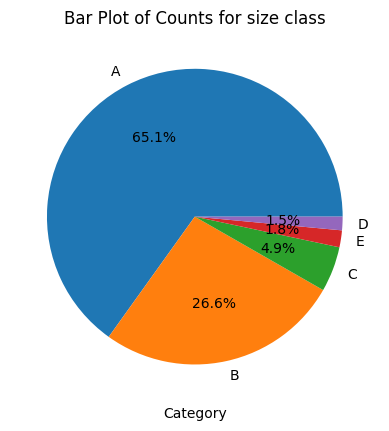

In [ ]:
size_class_counts = wildfire_subset['SIZE_CLASS'].value_counts()

size_class_counts_df = size_class_counts.reset_index()
size_class_counts_df.columns = ['Category', 'Count']

plt.pie(size_class_counts_df['Count'], data=size_class_counts_df, labels=size_class_counts_df['Category'], autopct='%1.1f%%')

plt.title('Bar Plot of Counts for size class')
plt.xlabel('Category')
plt.show()

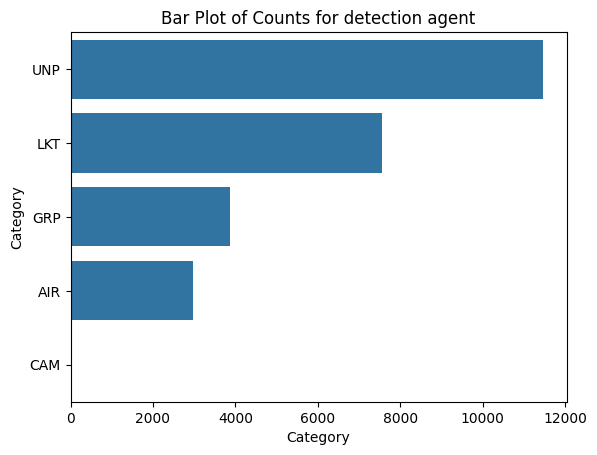

In [ ]:
detection_agent_type_counts = wildfire_subset['DETECTION_AGENT_TYPE'].value_counts()

detection_agent_type_counts_df = detection_agent_type_counts.reset_index()
detection_agent_type_counts_df.columns = ['Category', 'Count']

sns.barplot(x =detection_agent_type_counts_df['Count'], y ='Category', data=detection_agent_type_counts_df)

plt.title('Bar Plot of Counts for detection agent')
plt.xlabel('Category')
plt.show()

In [ ]:
detection_agent_type_analysis = pd.crosstab(wildfire_subset['GENERAL_CAUSE'], wildfire_subset['SIZE_CLASS'],values = wildfire_subset['DETECTION_AGENT_TYPE'],aggfunc=lambda x: x.mode()[0] if not x.mode().empty else None  )
detection_agent_type_analysis = detection_agent_type_analysis.fillna('NA')
detection_agent_type_analysis

SIZE_CLASS,A,B,C,D,E
GENERAL_CAUSE,,,,,
Agriculture Industry,UNP,UNP,LKT,LKT,LKT
Forest Industry,UNP,UNP,UNP,UNP,LKT
Government,UNP,UNP,UNP,UNP,LKT
Incendiary,UNP,UNP,LKT,LKT,LKT
Lightning,LKT,LKT,LKT,LKT,LKT
Oil & Gas Industry,UNP,UNP,LKT,LKT,LKT
Other Industry,UNP,UNP,UNP,UNP,UNP
Power Line Industry,UNP,UNP,LKT,LKT,UNP
Prescribed Fire,UNP,LKT,AIR,GRP,UNP


In [ ]:
#Creating a new column showing the city location
city_dict = { 'C' : 'Calgary',
             'E' : 'Edson' ,
              'H' : 'High Level',
              'G' : 'Grand Prairie',
              'L' : 'Lac La Bichi' ,
              'M' : 'Fort McMurray',
              'P' : 'Peace River',
              'R' : 'Rocky',
              'S' : 'Slave Lake',
              'W' : 'Whitecourt'}
wildfire_subset['CITY'] = wildfire_subset['FIRE_NUMBER'].str[0].map(city_dict)

In [ ]:
wildfire_subset.head()

,YEAR,FIRE_NUMBER,SIZE_CLASS,LATITUDE,LONGITUDE,GENERAL_CAUSE,DETECTION_AGENT_TYPE,DETECTION_AGENT,FIRE_START_DATE,FIRE_SPREAD_RATE,FUEL_TYPE,TEMPERATURE,RELATIVE_HUMIDITY,WIND_SPEED,FIRST_EX_DATE,FIRST_EX_SIZE_PERIMETER,MONTH,DAYS_COUNT,CITY
0,2006,PWF001,A,56.249956,-117.181960,Resident,UNP,310,2006-04-02 12:00:00,0.0,O1a,18.0,10.0,2.0,2006-04-03 10:20:00,0.10,4,0.0,Peace River
1,2006,EWF002,B,53.606367,-115.915733,Incendiary,UNP,310,2006-04-03 12:10:00,0.0,O1a,12.0,22.0,10.0,2006-04-03 14:00:00,0.20,4,0.0,Edson
2,2006,EWF001,B,53.610933,-115.594267,Incendiary,UNP,310,2006-04-03 12:15:00,0.0,O1a,12.0,22.0,10.0,2006-04-03 15:00:00,0.50,4,0.0,Edson
3,2006,EWF003,A,53.608867,-115.609467,Incendiary,UNP,PUB,2006-04-03 12:10:00,0.0,O1b,12.0,22.0,10.0,2006-04-03 15:05:00,0.01,4,0.0,Edson
4,2006,PWF002,A,56.249956,-117.050249,Other Industry,UNP,LFS,2006-04-03 17:00:00,0.1,O1a,6.0,37.0,2.0,2006-04-05 10:18:00,0.10,4,1.0,Peace River


In [ ]:
#Distribution of Wildfire based on the location
wildfire_subset['CITY'].value_counts()

,count
CITY,
Calgary,4098
High Level,3834
Slave Lake,3511
Lac La Bichi,3252
Peace River,2363
Edson,1983
Fort McMurray,1983
Rocky,1841
Grand Prairie,1726


In [ ]:
wildfire_subset['FIRE_START_DATE'] = pd.to_datetime(wildfire_subset['FIRE_START_DATE'],errors='coerce')
wildfire_subset['FIRST_EX_DATE'] = pd.to_datetime(wildfire_subset['FIRST_EX_DATE'],errors='coerce')

wildfire_subset['DAYS_COUNT'] = (wildfire_subset['FIRST_EX_DATE'] - wildfire_subset['FIRE_START_DATE']).dt.days
#wildfire_subset['DAYS_COUNT'] = wildfire_subset['DAYS_COUNT'].apply(lambda x: f"{x:.0f}")
wildfire_subset['DAYS_COUNT'] = wildfire_subset['DAYS_COUNT'].apply(lambda x: int(x) if pd.notna(x) else x)
wildfire_subset.head()

,YEAR,FIRE_NUMBER,SIZE_CLASS,LATITUDE,LONGITUDE,GENERAL_CAUSE,DETECTION_AGENT_TYPE,DETECTION_AGENT,FIRE_START_DATE,FIRE_SPREAD_RATE,FUEL_TYPE,TEMPERATURE,RELATIVE_HUMIDITY,WIND_SPEED,FIRST_EX_DATE,FIRST_EX_SIZE_PERIMETER,MONTH,DAYS_COUNT
0,2006,PWF001,A,56.249956,-117.181960,Resident,UNP,310,2006-04-02 12:00:00,0.0,O1a,18.0,10.0,2.0,2006-04-03 10:20:00,0.10,4.0,0.0
1,2006,EWF002,B,53.606367,-115.915733,Incendiary,UNP,310,2006-04-03 12:10:00,0.0,O1a,12.0,22.0,10.0,2006-04-03 14:00:00,0.20,4.0,0.0
2,2006,EWF001,B,53.610933,-115.594267,Incendiary,UNP,310,2006-04-03 12:15:00,0.0,O1a,12.0,22.0,10.0,2006-04-03 15:00:00,0.50,4.0,0.0
3,2006,EWF003,A,53.608867,-115.609467,Incendiary,UNP,PUB,2006-04-03 12:10:00,0.0,O1b,12.0,22.0,10.0,2006-04-03 15:05:00,0.01,4.0,0.0
4,2006,PWF002,A,56.249956,-117.050249,Other Industry,UNP,LFS,2006-04-03 17:00:00,0.1,NaN,6.0,37.0,2.0,2006-04-05 10:18:00,0.10,4.0,1.0


In [ ]:
wildfire_subset['DAYS_COUNT'].unique()

array([0.000e+00, 1.000e+00, 9.400e+01, 6.000e+00, 2.200e+01, 2.000e+00,
       1.300e+01, 3.000e+00, 9.000e+00, 1.400e+01, 7.000e+00, 4.900e+01,
       5.000e+00, 3.200e+01, 2.600e+01, 3.400e+01, 8.000e+00, 1.360e+02,
       4.000e+00, 3.300e+01, 2.900e+01, 1.000e+01, 1.670e+02, 1.900e+01,
       1.500e+01, 4.500e+01, 1.000e+02, 3.000e+01, 1.200e+01, 7.900e+01,
       1.100e+01, 3.700e+01, 1.600e+01, 8.900e+01, 2.100e+01, 1.800e+01,
       7.800e+01, 6.700e+01, 7.700e+01, 9.100e+01, 2.700e+01, 1.820e+02,
       2.000e+01, 2.910e+02, 3.800e+01, 6.200e+01, 1.640e+02, 2.500e+01,
       3.600e+01, 1.190e+02, 1.550e+02, 3.500e+01, 1.020e+02, 4.400e+01,
       1.840e+02, 1.880e+02, 7.100e+01, 1.050e+02, 8.300e+01, 1.140e+02,
       5.800e+01, 3.900e+01, 3.100e+01, 8.800e+01, 1.040e+02, 2.800e+01,
       3.650e+02, 5.700e+01, 1.700e+01, 1.600e+02, 1.380e+02, 1.410e+02,
       9.000e+01, 3.660e+02, 1.210e+02, 6.500e+01, 8.310e+02, 6.100e+01,
       1.160e+02, 7.400e+01, 8.600e+01, 1.230e+02, 

In [ ]:
wildfire_subset.isna().sum()

,0
YEAR,0
FIRE_NUMBER,0
SIZE_CLASS,0
LATITUDE,0
LONGITUDE,0
GENERAL_CAUSE,0
DETECTION_AGENT_TYPE,0
DETECTION_AGENT,0
FIRE_START_DATE,4
FIRE_SPREAD_RATE,4


In [ ]:
wildfire_subset['DAYS_COUNT'].fillna(0, inplace=True)

<ipython-input-30-48a0430ef691>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  wildfire_subset['DAYS_COUNT'].fillna(0, inplace=True)


Objectives:
- Distribution of wildfire across Alberta ( Indentifying the area prone to wildfires in the past 24 years)
- The number of fires in regions ( obtain this by identifying the first letter in the fire number and matching it to the place dictionary)
- What factors are responsible for identifying the fire spread rate. (location, humidity, weather condition, temperature, wind speed, distance from water source, general cause) Buidling a model
- Clustering the distribution based on the location and the average of different factors across the 24 yrs
- Identifying the distribution of general causes for wildfire over the years
- Analyzing the effectiveness of distinguishing fire of a particular class and a particular detergent
- Year over Year trend of the fire across Alberta

In [ ]:
map = folium.Map(location=[wildfire_subset['LATITUDE'].iloc[0],wildfire_subset['LONGITUDE'].iloc[0]])

In [ ]:
heat_data = [[row['LATITUDE'], row['LONGITUDE']] for index, row in wildfire_subset.iterrows()]
HeatMap(heat_data).add_to(map)


In [ ]:
wildfire_subset.to_csv('wildfire_subset.csv', index=False)

In [ ]:
wildfire_subset.dtypes

,0
YEAR,int64
FIRE_NUMBER,object
SIZE_CLASS,object
LATITUDE,float64
LONGITUDE,float64
GENERAL_CAUSE,object
DETECTION_AGENT_TYPE,object
DETECTION_AGENT,object
FIRE_START_DATE,datetime64[ns]
FIRE_SPREAD_RATE,float64


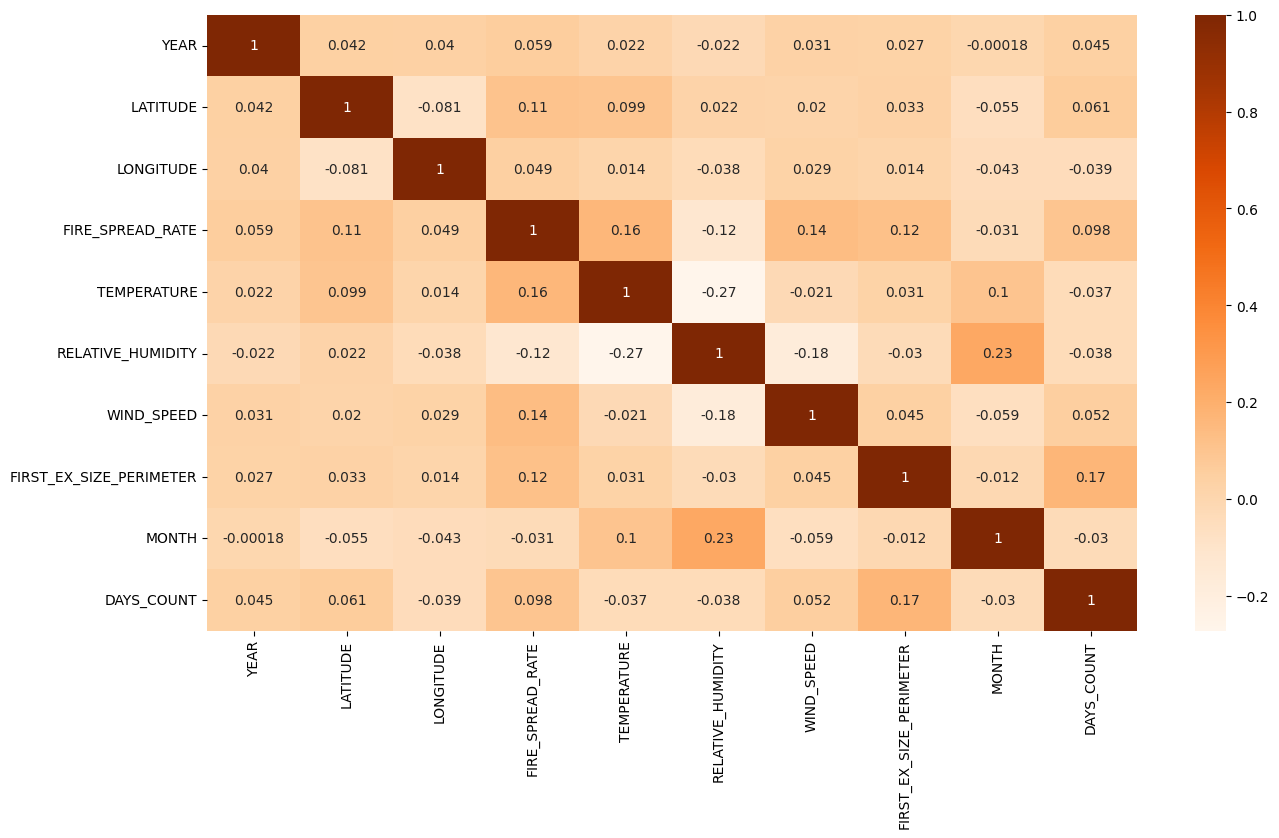

In [ ]:
# Corelation heat map
num_df = wildfire_subset.select_dtypes(include=['number'])
wildfire_subset_corr = num_df.corr()

plt.figure ( figsize = (15,8))
ax = sns.heatmap(data = wildfire_subset_corr,cmap = 'Oranges', annot = True )
#sns.heatmap( wildfire_subset_corr , vmin = -1, vmax = 1, annot=True, cmap="Spectral")
plt.show()

There seems to be no strong correlation that exist between any numerical values.

In [ ]:
X = wildfire_subset.drop(['DETECTION_AGENT_TYPE','DETECTION_AGENT','FIRE_NUMBER','YEAR','LATITUDE','LONGITUDE','FIRE_START_DATE','FIRST_EX_DATE','DAYS_COUNT'], axis = 1)
y = wildfire_subset[[ 'DAYS_COUNT']]

In [ ]:
# creating dummy variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)

X.head()

,FIRE_SPREAD_RATE,TEMPERATURE,RELATIVE_HUMIDITY,WIND_SPEED,FIRST_EX_SIZE_PERIMETER,MONTH,SIZE_CLASS_B,SIZE_CLASS_C,SIZE_CLASS_D,SIZE_CLASS_E,...,FUEL_TYPE_UNK,CITY_Edson,CITY_Fort McMurray,CITY_Grand Prairie,CITY_High Level,CITY_Lac La Bichi,CITY_Peace River,CITY_Rocky,CITY_Slave Lake,CITY_Whitecourt
0,0.0,18.0,10.0,2.0,0.10,4,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,0.0,12.0,22.0,10.0,0.20,4,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2,0.0,12.0,22.0,10.0,0.50,4,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3,0.0,12.0,22.0,10.0,0.01,4,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
4,0.1,6.0,37.0,2.0,0.10,4,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [ ]:
x_train , x_test , y_train , y_test = train_test_split ( X, y , test_size = 0.2 , random_state = 1 )

In [ ]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 20682
Number of rows in test data = 5171


In [ ]:
# shape of test, train set

print('x_train:', x_train.shape)
print('x_test:', x_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

x_train: (20682, 48)
x_test: (5171, 48)
y_train: (20682, 1)
y_test: (5171, 1)


In [ ]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(x_train, y_train)

LinearRegression()

In [ ]:
# co-efficient and intercept of the variables based on the model

coef_df = pd.DataFrame(
    np.append(lin_reg_model.coef_, lin_reg_model.intercept_),
    index=x_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)
coef_df

,Coefficients
FIRE_SPREAD_RATE,0.515926
TEMPERATURE,-0.415952
RELATIVE_HUMIDITY,-0.079666
WIND_SPEED,0.069039
FIRST_EX_SIZE_PERIMETER,0.001037
MONTH,-0.275228
SIZE_CLASS_B,0.824308
SIZE_CLASS_C,9.787058
SIZE_CLASS_D,28.389740
SIZE_CLASS_E,88.487758


In [ ]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2
        },
        index=[0],
    )

    return df_perf

In [ ]:
# Checking model performance on train set
print("Training Performance\n")
lin_reg_model_train_perf = model_performance_regression(lin_reg_model, x_train, y_train)
lin_reg_model_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared
0,59.500153,12.227599,0.087958,0.085837


In [ ]:
# Checking model performance on test set
print("Test Performance\n")
lin_reg_model_test_perf = model_performance_regression(lin_reg_model, x_test, y_test)
lin_reg_model_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared
0,58.544357,13.708077,0.117385,0.109114


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
X = wildfire_subset.drop(['DETECTION_AGENT_TYPE','DETECTION_AGENT','FIRE_NUMBER','YEAR','LATITUDE','LONGITUDE','FIRE_START_DATE','FIRST_EX_DATE','SIZE_CLASS','DAYS_COUNT'], axis = 1)
y = wildfire_subset[[ 'SIZE_CLASS']]


In [ ]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 20682
Number of rows in test data = 5171


In [ ]:
# shape of test, train set

print('x_train:', x_train.shape)
print('x_test:', x_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

x_train: (20682, 48)
x_test: (5171, 48)
y_train: (20682, 1)
y_test: (5171, 1)


In [ ]:
# creating dummy variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)

X.head()


,FIRE_SPREAD_RATE,TEMPERATURE,RELATIVE_HUMIDITY,WIND_SPEED,FIRST_EX_SIZE_PERIMETER,MONTH,GENERAL_CAUSE_Forest Industry,GENERAL_CAUSE_Government,GENERAL_CAUSE_Incendiary,GENERAL_CAUSE_Lightning,...,FUEL_TYPE_UNK,CITY_Edson,CITY_Fort McMurray,CITY_Grand Prairie,CITY_High Level,CITY_Lac La Bichi,CITY_Peace River,CITY_Rocky,CITY_Slave Lake,CITY_Whitecourt
0,0.0,18.0,10.0,2.0,0.10,4,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,0.0,12.0,22.0,10.0,0.20,4,False,False,True,False,...,False,True,False,False,False,False,False,False,False,False
2,0.0,12.0,22.0,10.0,0.50,4,False,False,True,False,...,False,True,False,False,False,False,False,False,False,False
3,0.0,12.0,22.0,10.0,0.01,4,False,False,True,False,...,False,True,False,False,False,False,False,False,False,False
4,0.1,6.0,37.0,2.0,0.10,4,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [ ]:
le = LabelEncoder()
y = le.fit_transform(y)

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
y

array([0, 1, 1, ..., 4, 1, 0])

In [ ]:
df = wildfire_subset.drop(['DETECTION_AGENT_TYPE','DETECTION_AGENT','FIRE_NUMBER','YEAR','LATITUDE','LONGITUDE','FIRE_START_DATE','FIRST_EX_DATE','DAYS_COUNT','CITY'], axis = 1)
df_encoded = pd.get_dummies(df, columns=[ 'SIZE_CLASS', 'GENERAL_CAUSE','FUEL_TYPE'], drop_first=True)

# Compute correlation between independent variables and target ('fire_class')
correlation_matrix = df.corr()
correlation_matrix

ValueError: could not convert string to float: 'A'

In [ ]:
# Drop unnecessary columns
df = wildfire_subset.drop(['DETECTION_AGENT_TYPE', 'DETECTION_AGENT', 'FIRE_NUMBER', 'YEAR',
                           'LATITUDE', 'LONGITUDE', 'FIRE_START_DATE', 'FIRST_EX_DATE',
                           'DAYS_COUNT', 'CITY','FUEL_TYPE'], axis=1)

# One-hot encoding for categorical variables
df_encoded = pd.get_dummies(df, columns=['SIZE_CLASS', 'GENERAL_CAUSE'], drop_first=True)

# Compute correlation matrix using df_encoded
correlation_matrix = df_encoded.corr()

# Display correlation matrix
correlation_matrix


,FIRE_SPREAD_RATE,TEMPERATURE,RELATIVE_HUMIDITY,WIND_SPEED,FIRST_EX_SIZE_PERIMETER,MONTH,SIZE_CLASS_B,SIZE_CLASS_C,SIZE_CLASS_D,SIZE_CLASS_E,...,GENERAL_CAUSE_Oil & Gas Industry,GENERAL_CAUSE_Other Industry,GENERAL_CAUSE_Power Line Industry,GENERAL_CAUSE_Prescribed Fire,GENERAL_CAUSE_Railroad,GENERAL_CAUSE_Recreation,GENERAL_CAUSE_Resident,GENERAL_CAUSE_Restart,GENERAL_CAUSE_Under Investigation,GENERAL_CAUSE_Undetermined
FIRE_SPREAD_RATE,1.000000,0.161328,-0.120584,0.137002,0.118411,-0.031045,0.084924,0.220037,0.196317,0.299036,...,-0.000623,-0.025536,-0.019538,0.021584,-0.006875,-0.066445,-0.078874,-0.006023,0.027620,-0.003760
TEMPERATURE,0.161328,1.000000,-0.272162,-0.021365,0.030937,0.103621,0.037304,0.058472,0.063448,0.101013,...,-0.024596,-0.034773,-0.041899,-0.014228,-0.004704,-0.078072,-0.163509,0.008124,-0.027756,-0.030309
RELATIVE_HUMIDITY,-0.120584,-0.272162,1.000000,-0.177742,-0.029824,0.231629,-0.117309,-0.073605,-0.058383,-0.076017,...,-0.050937,-0.013042,-0.026882,-0.024723,-0.052952,0.007449,-0.101812,-0.003555,0.001130,-0.063267
WIND_SPEED,0.137002,-0.021365,-0.177742,1.000000,0.044580,-0.059160,0.065810,0.101085,0.088585,0.106113,...,0.034850,0.017332,0.142407,0.013142,0.003747,-0.046679,0.018718,-0.000783,0.008289,0.021160
FIRST_EX_SIZE_PERIMETER,0.118411,0.030937,-0.029824,0.044580,1.000000,-0.012386,-0.023130,-0.008295,-0.002895,0.278333,...,-0.003045,-0.003540,-0.004686,-0.000862,-0.002858,-0.018869,-0.017347,-0.001911,0.096927,0.016459
MONTH,-0.031045,0.103621,0.231629,-0.059160,-0.012386,1.000000,-0.095453,-0.033099,-0.005307,-0.004962,...,-0.046938,-0.030324,0.006592,-0.013154,-0.029677,0.139824,-0.158348,0.020891,0.009638,-0.018891
SIZE_CLASS_B,0.084924,0.037304,-0.117309,0.065810,-0.023130,-0.095453,1.000000,-0.137351,-0.073858,-0.082577,...,0.022793,-0.002422,0.020473,0.003043,0.036063,-0.217396,0.013180,-0.000529,-0.000173,0.024812
SIZE_CLASS_C,0.220037,0.058472,-0.073605,0.101085,-0.008295,-0.033099,-0.137351,1.000000,-0.027964,-0.031266,...,-0.012173,-0.011686,-0.015236,0.000400,0.002114,-0.081033,-0.017990,-0.000760,0.012676,0.014862
SIZE_CLASS_D,0.196317,0.063448,-0.058383,0.088585,-0.002895,-0.005307,-0.073858,-0.027964,1.000000,-0.016813,...,-0.004612,-0.005421,-0.004384,0.008489,-0.000573,-0.049435,-0.031122,0.006630,0.006205,-0.003270
SIZE_CLASS_E,0.299036,0.101013,-0.076017,0.106113,0.278333,-0.004962,-0.082577,-0.031266,-0.016813,1.000000,...,0.002986,-0.013057,-0.011722,0.006888,-0.010261,-0.057754,-0.055481,-0.006883,0.049077,-0.011254


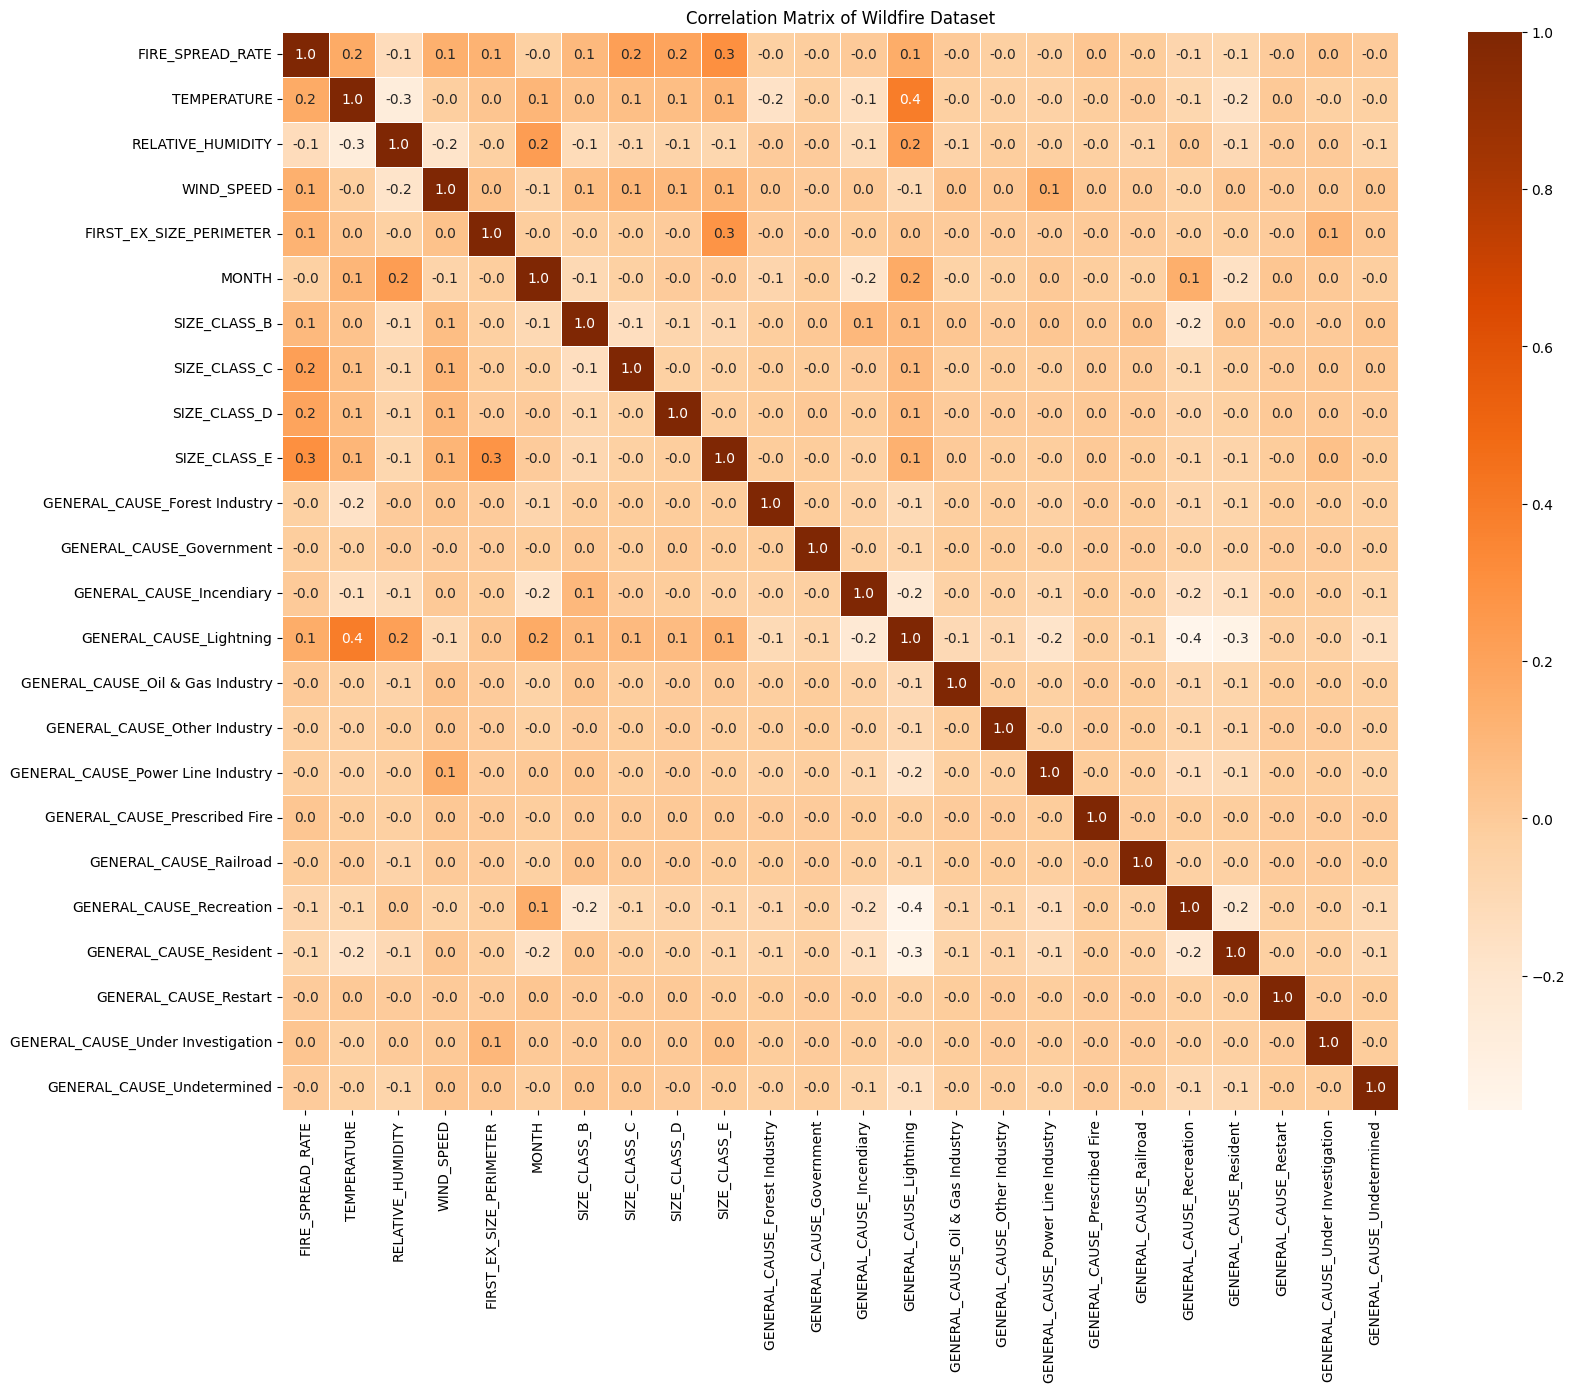

In [ ]:
# Create heatmap with a color scheme
plt.figure(figsize=(18, 14))

sns.heatmap(correlation_matrix, annot=True, cmap="Oranges", fmt=".1f", linewidths=0.5)

# Title for the heatmap
plt.title("Correlation Matrix of Wildfire Dataset")

# Show the plot
plt.show()

In [ ]:
size_class_columns = [col for col in df_encoded.columns if col.startswith('SIZE_CLASS_')]
correlation_with_target = correlation_matrix[size_class_columns]
# Display correlation values
print(correlation_with_target)

                                   SIZE_CLASS_B  SIZE_CLASS_C  SIZE_CLASS_D  \
FIRE_SPREAD_RATE                       0.084924      0.220037      0.196317   
TEMPERATURE                            0.037304      0.058472      0.063448   
RELATIVE_HUMIDITY                     -0.117309     -0.073605     -0.058383   
WIND_SPEED                             0.065810      0.101085      0.088585   
FIRST_EX_SIZE_PERIMETER               -0.023130     -0.008295     -0.002895   
MONTH                                 -0.095453     -0.033099     -0.005307   
SIZE_CLASS_B                           1.000000     -0.137351     -0.073858   
SIZE_CLASS_C                          -0.137351      1.000000     -0.027964   
SIZE_CLASS_D                          -0.073858     -0.027964      1.000000   
SIZE_CLASS_E                          -0.082577     -0.031266     -0.016813   
GENERAL_CAUSE_Forest Industry         -0.011992     -0.006892     -0.007680   
GENERAL_CAUSE_Government               0.012409     

In [ ]:
x_train , x_test , y_train , y_test = train_test_split ( X, y , test_size = 0.2 , random_state = 1 )

In [ ]:
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:


# Predict on the test data
y_pred = rf.predict(x_test)

In [ ]:
# Evaluate model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 98.72%


In [ ]:
# Feature importance
print('Feature Importance:', rf.feature_importances_)

Feature Importance: [8.85971487e-02 2.87448494e-02 3.54846476e-02 2.88891893e-02
 7.19043326e-01 1.62560724e-02 6.00632717e-04 4.60886584e-04
 2.64070150e-03 6.10280774e-03 8.46305928e-04 5.19675455e-04
 1.65218289e-03 8.48649672e-05 5.57819683e-04 1.48211646e-02
 2.57225226e-03 2.23874266e-04 6.10031442e-04 1.30071030e-03
 5.48733434e-03 1.37254435e-03 4.92769510e-04 9.34148098e-06
 1.03747517e-05 9.98538206e-04 1.64759117e-03 2.54554530e-03
 3.07012160e-06 9.63861485e-06 6.47388654e-03 1.91782039e-03
 7.95420441e-04 9.25364348e-04 1.15772070e-04 1.96551218e-03
 3.09792555e-03 1.68860016e-03 9.78006065e-03 2.54016068e-03
 2.16929509e-03 1.73336208e-03 2.76465804e-03 1.44626997e-03]


In [ ]:
from sklearn.metrics import classification_report
#change the random forest analysis to size_class

print(classification_report(y_test, y_pred,target_names = ['A', 'B','C','D','E']))


              precision    recall  f1-score   support

           A       1.00      1.00      1.00      3409
           B       0.99      1.00      0.99      1373
           C       0.84      0.94      0.89       218
           D       0.93      0.57      0.71        68
           E       0.90      0.76      0.82       103

    accuracy                           0.99      5171
   macro avg       0.93      0.86      0.88      5171
weighted avg       0.99      0.99      0.99      5171



In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test, rf.predict_proba(x_test), multi_class="ovo")
print(f'Multi-Class ROC-AUC (OvO) Score: {roc_auc:.4f}')


Multi-Class ROC-AUC (OvO) Score: 0.9886


(One-vs-One) computes a ROC curve for each pair of classes and averages them.

In [ ]:
row = x_test.iloc[0]
yhat = rf.predict([row])
print('Predicted Class: %d' % yhat[0])
print('Expected Class: %d' % y_test[0])

Predicted Class: 0
Expected Class: 0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
row = x_test.iloc[13]
yhat = rf.predict([row])
print('Predicted Class: %d' % yhat[0])
print('Expected Class: %d' % y_test[13])

Predicted Class: 0
Expected Class: 0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


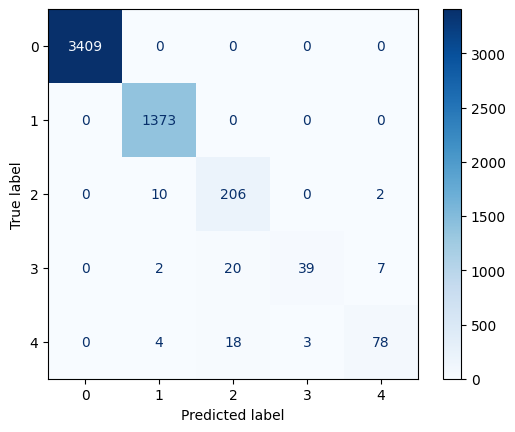

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)  # Replace with actual values
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.show()

The values in the ROC and the precision and accuracy are very high which means there is a very good chance of overfitting the model.

In [ ]:
df_dayscount_grouped = wildfire_subset.groupby(['YEAR', 'GENERAL_CAUSE'], as_index=False)['DAYS_COUNT'].sum()
df_dayscount_grouped



,YEAR,GENERAL_CAUSE,DAYS_COUNT
0,2006,Forest Industry,859.0
1,2006,Incendiary,55.0
2,2006,Lightning,3735.0
3,2006,Oil & Gas Industry,3268.0
4,2006,Other Industry,539.0
...,...,...,...
227,2024,Railroad,0.0
228,2024,Recreation,500.0
229,2024,Resident,2149.0
230,2024,Under Investigation,169.0


In [ ]:
df_numfires_grouped_1 = wildfire_subset.groupby(['YEAR', 'GENERAL_CAUSE'], as_index=False)['FIRE_NUMBER'].count()
df_numfires_grouped_1

,YEAR,GENERAL_CAUSE,FIRE_NUMBER
0,2006,Forest Industry,26
1,2006,Incendiary,69
2,2006,Lightning,747
3,2006,Oil & Gas Industry,69
4,2006,Other Industry,32
...,...,...,...
227,2024,Railroad,3
228,2024,Recreation,126
229,2024,Resident,141
230,2024,Under Investigation,29


In [ ]:
df_size_grouped_2 = wildfire_subset.groupby(['YEAR', 'GENERAL_CAUSE'], as_index=False)['FIRST_EX_SIZE_PERIMETER'].sum()
df_size_grouped_2

,YEAR,GENERAL_CAUSE,FIRST_EX_SIZE_PERIMETER
0,2006,Forest Industry,8.55
1,2006,Incendiary,91.04
2,2006,Lightning,97576.92
3,2006,Oil & Gas Industry,2746.88
4,2006,Other Industry,14628.65
...,...,...,...
227,2024,Railroad,0.61
228,2024,Recreation,167.53
229,2024,Resident,172.65
230,2024,Under Investigation,18627.69


In [ ]:
df_dayscount_grouped.to_csv('df_dayscount_grouped.csv', index=False)

In [ ]:
df_numfires_grouped_1.to_csv('df_numfires_grouped_1.csv', index=False)

In [ ]:
df_size_grouped_2.to_csv('df_size_grouped_2.csv', index=False)

In [ ]:
df_dayscount_nohumancause = df_dayscount_grouped[(df_dayscount_grouped['GENERAL_CAUSE'] != 'Recreation')& (df_dayscount_grouped[('GENERAL_CAUSE')] != 'Resident')& (df_dayscount_grouped[('GENERAL_CAUSE')] != 'Incendiary')]
df_dayscount_nohumancause

,YEAR,GENERAL_CAUSE,DAYS_COUNT
0,2006,Forest Industry,859.0
2,2006,Lightning,3735.0
3,2006,Oil & Gas Industry,3268.0
4,2006,Other Industry,539.0
5,2006,Power Line Industry,21.0
...,...,...,...
225,2024,Other Industry,187.0
226,2024,Power Line Industry,192.0
227,2024,Railroad,0.0
230,2024,Under Investigation,169.0


In [ ]:
df_numfires_nohumancause_1 = df_numfires_grouped_1[(df_numfires_grouped_1['GENERAL_CAUSE'] != 'Recreation')& (df_numfires_grouped_1[('GENERAL_CAUSE')] != 'Resident')& (df_numfires_grouped_1[('GENERAL_CAUSE')] != 'Incendiary')]
df_numfires_nohumancause_1

,YEAR,GENERAL_CAUSE,FIRE_NUMBER
0,2006,Forest Industry,26
2,2006,Lightning,747
3,2006,Oil & Gas Industry,69
4,2006,Other Industry,32
5,2006,Power Line Industry,50
...,...,...,...
225,2024,Other Industry,5
226,2024,Power Line Industry,82
227,2024,Railroad,3
230,2024,Under Investigation,29


In [ ]:
df_size_nohumancause_2 = df_size_grouped_2[(df_size_grouped_2['GENERAL_CAUSE'] != 'Recreation')& (df_size_grouped_2[('GENERAL_CAUSE')] != 'Resident')& (df_size_grouped_2[('GENERAL_CAUSE')] != 'Incendiary')]
df_size_nohumancause_2

,YEAR,GENERAL_CAUSE,FIRST_EX_SIZE_PERIMETER
0,2006,Forest Industry,8.55
2,2006,Lightning,97576.92
3,2006,Oil & Gas Industry,2746.88
4,2006,Other Industry,14628.65
5,2006,Power Line Industry,53.39
...,...,...,...
225,2024,Other Industry,0.39
226,2024,Power Line Industry,3249.83
227,2024,Railroad,0.61
230,2024,Under Investigation,18627.69


In [ ]:
df_dayscount_nohumancause.to_csv('df_dayscount_nohumancause.csv', index=False)

In [ ]:
df_numfires_nohumancause_1.to_csv('df_numfires_nohumancause_1.csv', index=False)

In [ ]:
df_size_nohumancause_2.to_csv('df_size_nohumancause_2.csv', index=False)

In [ ]:
df_city = wildfire_subset.groupby(['CITY', 'GENERAL_CAUSE'], as_index=False)['FIRE_NUMBER'].count()
df_size_grouped_2

,YEAR,GENERAL_CAUSE,FIRST_EX_SIZE_PERIMETER
0,2006,Forest Industry,8.55
1,2006,Incendiary,91.04
2,2006,Lightning,97576.92
3,2006,Oil & Gas Industry,2746.88
4,2006,Other Industry,14628.65
...,...,...,...
227,2024,Railroad,0.61
228,2024,Recreation,167.53
229,2024,Resident,172.65
230,2024,Under Investigation,18627.69


In [ ]:
#Distribution of Wildfire based on the location
wildfire_subset['CITY'].value_counts()

,count
CITY,
Calgary,4098
High Level,3834
Slave Lake,3511
Lac La Bichi,3254
Peace River,2363
Edson,1984
Fort McMurray,1984
Rocky,1841
Grand Prairie,1726


In [ ]:
logistic_regression = LogisticRegression(multi_class='multinomial', solver = 'lbfgs')

In [ ]:
X = wildfire_subset.drop(['DETECTION_AGENT_TYPE','DETECTION_AGENT','FIRE_NUMBER','YEAR','LATITUDE','LONGITUDE','FIRST_EX_DATE','FIRE_START_DATE','SIZE_CLASS'], axis = 1)
y = wildfire_subset[[ 'SIZE_CLASS']]

In [ ]:
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)

X.head()

,FIRE_SPREAD_RATE,TEMPERATURE,RELATIVE_HUMIDITY,WIND_SPEED,FIRST_EX_SIZE_PERIMETER,MONTH,DAYS_COUNT,GENERAL_CAUSE_Forest Industry,GENERAL_CAUSE_Government,GENERAL_CAUSE_Incendiary,...,FUEL_TYPE_UNK,CITY_Edson,CITY_Fort McMurray,CITY_Grand Prairie,CITY_High Level,CITY_Lac La Bichi,CITY_Peace River,CITY_Rocky,CITY_Slave Lake,CITY_Whitecourt
0,0.0,18.0,10.0,2.0,0.10,4,0.0,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,0.0,12.0,22.0,10.0,0.20,4,0.0,False,False,True,...,False,True,False,False,False,False,False,False,False,False
2,0.0,12.0,22.0,10.0,0.50,4,0.0,False,False,True,...,False,True,False,False,False,False,False,False,False,False
3,0.0,12.0,22.0,10.0,0.01,4,0.0,False,False,True,...,False,True,False,False,False,False,False,False,False,False
4,0.1,6.0,37.0,2.0,0.10,4,1.0,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [ ]:
le = LabelEncoder()
y = le.fit_transform(y)

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
x_train , x_test , y_train , y_test = train_test_split ( X, y , test_size = 0.2 , random_state = 1 )

In [ ]:
logistic_regression.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

In [ ]:
y_pred = logistic_regression.predict(x_test)

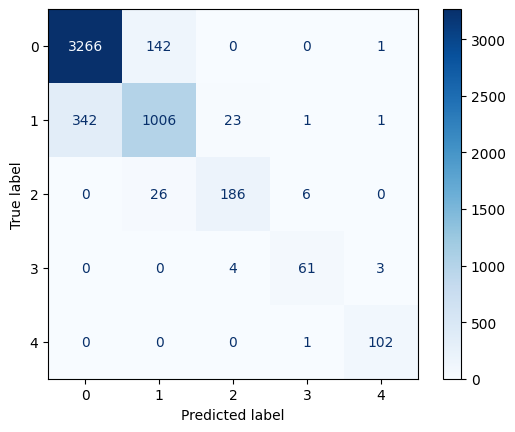

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)  # Replace with actual values
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, y_pred) * 100
print(f"Accuracy: {accuracy:.2f}%")

Accuracy: 89.36%


In [ ]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.91      0.96      0.93      3409
           1       0.86      0.73      0.79      1373
           2       0.87      0.85      0.86       218
           3       0.88      0.90      0.89        68
           4       0.95      0.99      0.97       103

    accuracy                           0.89      5171
   macro avg       0.89      0.89      0.89      5171
weighted avg       0.89      0.89      0.89      5171



In [ ]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

In [ ]:
rmse = np.sqrt(3199.85)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

In [ ]:
from folium.plugins import MarkerCluster

In [ ]:
map = folium.Map(location=[wildfire_subset['LATITUDE'].iloc[0],wildfire_subset['LONGITUDE'].iloc[0]])

In [ ]:
marker_cluster = MarkerCluster()

In [ ]:
for index, row in wildfire_subset.iterrows():
    marker = folium.Marker([row['LATITUDE'],row['LONGITUDE']])
    marker.add_to(marker_cluster)

marker_cluster.add_to(map)